In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings

In [2]:
#Import the dataset
df= pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
#Converting month column 
dates = pd.date_range(start='1995-01-01', freq='MS',periods=len(df))
dates

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [4]:
df['Month']= dates.month
df['Year'] = dates.year

In [5]:
df

,Month,Passengers,Year
0,1,112,1995
1,2,118,1995
2,3,132,1995
3,4,129,1995
4,5,121,1995
...,...,...,...
91,8,405,2002
92,9,355,2002
93,10,306,2002
94,11,271,2002


In [6]:
df.dtypes

Month         int64
Passengers    int64
Year          int64
dtype: object

In [7]:
#Get name of month
import calendar
df['Month']= df['Month'].apply(lambda x: calendar.month_abbr[x])
df

,Month,Passengers,Year
0,Jan,112,1995
1,Feb,118,1995
2,Mar,132,1995
3,Apr,129,1995
4,May,121,1995
...,...,...,...
91,Aug,405,2002
92,Sep,355,2002
93,Oct,306,2002
94,Nov,271,2002


In [8]:
df['Dates']= dates
df

,Month,Passengers,Year,Dates
0,Jan,112,1995,1995-01-01
1,Feb,118,1995,1995-02-01
2,Mar,132,1995,1995-03-01
3,Apr,129,1995,1995-04-01
4,May,121,1995,1995-05-01
...,...,...,...,...
91,Aug,405,2002,2002-08-01
92,Sep,355,2002,2002-09-01
93,Oct,306,2002,2002-10-01
94,Nov,271,2002,2002-11-01


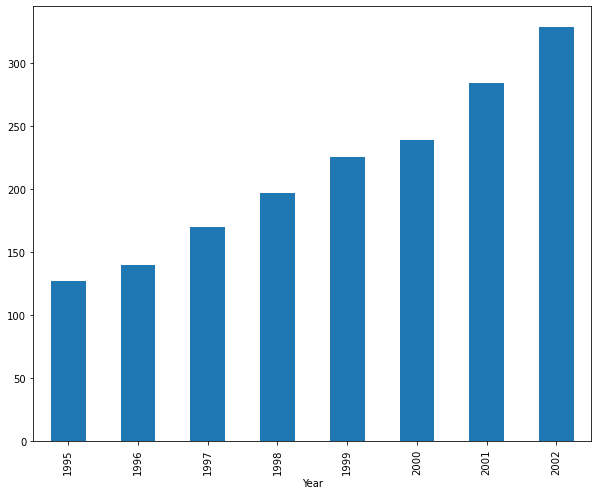

In [9]:
#EDA

plt.figure(figsize=(10,8))
df.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()

In [10]:
print('From the above figure we can see that passengers are increasing with the increase in the year')

From the above figure we can see that passengers are increasing with the increase in the year


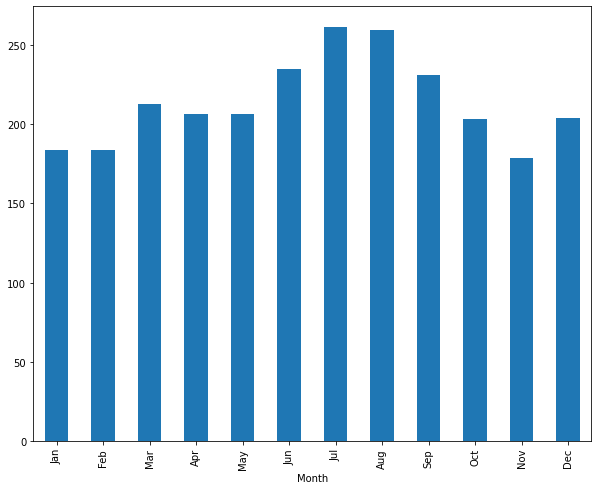

In [11]:
plt.figure(figsize=(10,8))
df.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun',
                                                        'Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')

plt.show()

In [12]:
print('From the above figure we can see that more passengers can be seen between months June to September')

From the above figure we can see that more passengers can be seen between months June to September


In [13]:
#Plotting the data to see seasonality
passengers_count = df['Passengers']

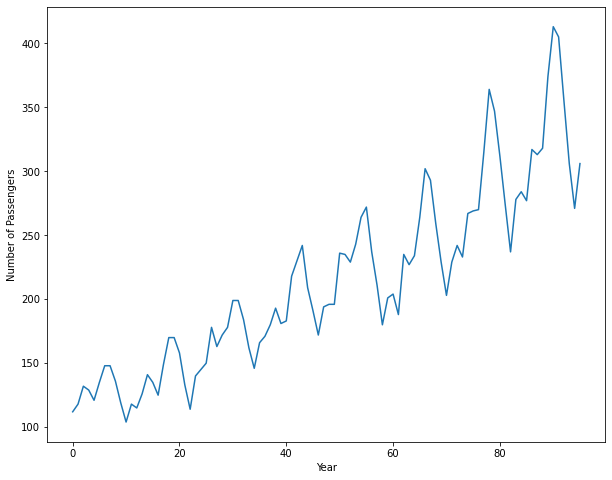

In [14]:
plt.figure(figsize=(10,8))
passengers_count.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

In [15]:
df_dum= pd.DataFrame(pd.get_dummies(df['Month']))
df_dum

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
df_refined = pd.concat((df,df_dum),axis=1)
df_refined

,Month,Passengers,Year,Dates,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan,112,1995,1995-01-01,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb,118,1995,1995-02-01,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar,132,1995,1995-03-01,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr,129,1995,1995-04-01,1,0,0,0,0,0,0,0,0,0,0,0
4,May,121,1995,1995-05-01,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug,405,2002,2002-08-01,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep,355,2002,2002-09-01,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct,306,2002,2002-10-01,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov,271,2002,2002-11-01,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
t= np.arange(1,97)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96])

In [18]:
df_refined['t']=t
df_refined['tSquare'] = df_refined['t']*df_refined['t']
df_refined

,Month,Passengers,Year,Dates,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,tSquare
0,Jan,112,1995,1995-01-01,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,Feb,118,1995,1995-02-01,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,Mar,132,1995,1995-03-01,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,Apr,129,1995,1995-04-01,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,May,121,1995,1995-05-01,0,0,0,0,0,0,0,0,1,0,0,0,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug,405,2002,2002-08-01,0,1,0,0,0,0,0,0,0,0,0,0,92,8464
92,Sep,355,2002,2002-09-01,0,0,0,0,0,0,0,0,0,0,0,1,93,8649
93,Oct,306,2002,2002-10-01,0,0,0,0,0,0,0,0,0,0,1,0,94,8836
94,Nov,271,2002,2002-11-01,0,0,0,0,0,0,0,0,0,1,0,0,95,9025


In [19]:
#taking log of the Passengers
log_Passe = np.log(df_refined['Passengers'])
type(log_Passe)

pandas.core.series.Series

In [20]:
df_refined['logPass']= log_Passe
df_refined

,Month,Passengers,Year,Dates,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,tSquare,logPass
0,Jan,112,1995,1995-01-01,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb,118,1995,1995-02-01,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar,132,1995,1995-03-01,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr,129,1995,1995-04-01,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May,121,1995,1995-05-01,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug,405,2002,2002-08-01,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,Sep,355,2002,2002-09-01,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,Oct,306,2002,2002-10-01,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,Nov,271,2002,2002-11-01,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [21]:
df_refined.columns

Index(['Month', 'Passengers', 'Year', 'Dates', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 'tSquare',
       'logPass'],
      dtype='object')

In [22]:
df_refined=df_refined[['Month', 'Year', 'Dates', 'Passengers', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 'tSquare','logPass']]
df_refined

,Month,Year,Dates,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,tSquare,logPass
0,Jan,1995,1995-01-01,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb,1995,1995-02-01,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar,1995,1995-03-01,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr,1995,1995-04-01,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May,1995,1995-05-01,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug,2002,2002-08-01,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,Sep,2002,2002-09-01,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,Oct,2002,2002-10-01,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,Nov,2002,2002-11-01,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [23]:
#Splitting the data into train-test

train = df_refined.head(71)
train

,Month,Year,Dates,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,tSquare,logPass
0,Jan,1995,1995-01-01,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb,1995,1995-02-01,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar,1995,1995-03-01,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr,1995,1995-04-01,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May,1995,1995-05-01,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Jul,2000,2000-07-01,302,0,0,0,0,0,1,0,0,0,0,0,0,67,4489,5.710427
67,Aug,2000,2000-08-01,293,0,1,0,0,0,0,0,0,0,0,0,0,68,4624,5.680173
68,Sep,2000,2000-09-01,259,0,0,0,0,0,0,0,0,0,0,0,1,69,4761,5.556828
69,Oct,2000,2000-10-01,229,0,0,0,0,0,0,0,0,0,0,1,0,70,4900,5.433722


In [24]:
test = df_refined.tail(25)
test

,Month,Year,Dates,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,tSquare,logPass
71,Dec,2000,2000-12-01,229,0,0,1,0,0,0,0,0,0,0,0,0,72,5184,5.433722
72,Jan,2001,2001-01-01,242,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938
73,Feb,2001,2001-02-01,233,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038
74,Mar,2001,2001-03-01,267,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249
75,Apr,2001,2001-04-01,269,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,May,2001,2001-05-01,270,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
77,Jun,2001,2001-06-01,315,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
78,Jul,2001,2001-07-01,364,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154
79,Aug,2001,2001-08-01,347,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325
80,Sep,2001,2001-09-01,312,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,5.743003


In [25]:
import statsmodels.formula.api as smf

In [26]:
#Linear model
linear_m= smf.ols('Passengers~t', data=train).fit()
pred_li = pd.Series(linear_m.predict(pd.DataFrame(test['t'])))
rmse_li = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_li))**2))
rmse_li

49.932008506893254

In [27]:
#Quadratic model
quad_m = smf.ols('Passengers~t+tSquare', data=train).fit()
pred_quad = pd.Series(quad_m.predict(pd.DataFrame(test[['t','tSquare']])))
rmse_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2))
rmse_quad

48.01634803566845

In [28]:
#exponential model
expo_m= smf.ols('logPass~t', data=train).fit()
pred_expo = pd.Series(expo_m.predict(pd.DataFrame(test['t'])))
rmse_expo = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_expo)))**2))
rmse_expo

42.120238408344655

In [29]:
#additive seasonality
#'Apr'+'Aug'+'Dec'+'Feb'+'Jan'+'Jul'+'Jun'+'Mar'+'May'+'Nov'+'Oct'+'Sep'
additive_m = smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
pred_add = pd.Series(additive_m.predict(pd.DataFrame(test[['Apr','Aug','Dec','Feb','Jan','Jul',
                                                           'Jun','Mar','May','Nov','Oct','Sep']])))
rmse_add = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add))**2))
rmse_add

126.22162484209174

In [30]:
#additive seasonality with linear trend
add_li= smf.ols('Passengers~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
pred_add_li = pd.Series(add_li.predict(pd.DataFrame(test[['t','Apr','Aug','Dec','Feb','Jan','Jul',
                                                           'Jun','Mar','May','Nov','Oct','Sep']])))
rmse_add_li = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_li))**2))
rmse_add_li

35.581024986137926

In [31]:
#additive seasonality with quadratic trend
add_quad = smf.ols('Passengers~t+tSquare+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
pred_add_quad = pd.Series(add_quad.predict(pd.DataFrame(test[['t','tSquare','Apr','Aug','Dec','Feb','Jan','Jul',
                                                           'Jun','Mar','May','Nov','Oct','Sep']])))
rmse_add_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_quad))**2))
rmse_add_quad

33.18295132583778

In [32]:
#Multiplicative seasonality 
mul_sea = smf.ols('logPass~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep', data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(pd.DataFrame(test[['Apr','Aug','Dec','Feb','Jan','Jul',
                                                           'Jun','Mar','May','Nov','Oct','Sep']])))
rmse_mul_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

130.9943900421397

In [33]:
#Multiplicative seasonality with liner trend
mul_li = smf.ols('logPass~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
pred_mul_li= pd.Series(mul_li.predict(pd.DataFrame(test[['t','Apr','Aug','Dec','Feb','Jan','Jul',
                                                           'Jun','Mar','May','Nov','Oct','Sep']])))
rmse_mul_li = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_li)))**2))
rmse_mul_li

11.780371336295882

In [34]:
#multiplicative seasonality with quadratic trend
mul_quad = smf.ols('logPass~t+tSquare+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
pred_mul_quad = pd.Series(mul_quad.predict(test[['t','tSquare','Apr','Aug','Dec','Feb','Jan','Jul',
                                                           'Jun','Mar','May','Nov','Oct','Sep']]))
rmse_mul_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

30.29066191161005

In [35]:
#tabulating the rmse values
data_rmse= {
    'Model':pd.Series([
    'rmse_li','rmse_quad','rmse_expo','rmse_add','rmse_add_li',
        'rmse_add_quad','rmse_mul_sea','rmse_mul_li','rmse_mul_quad'
]),
    'Values':pd.Series([
        rmse_li,rmse_quad,rmse_expo,rmse_add,rmse_add_li,
        rmse_add_quad,rmse_mul_sea,rmse_mul_li,rmse_mul_quad                                             
    ])
}

In [36]:
df_rmse= pd.DataFrame(data_rmse)
df_rmse

,Model,Values
0,rmse_li,49.932009
1,rmse_quad,48.016348
2,rmse_expo,42.120238
3,rmse_add,126.221625
4,rmse_add_li,35.581025
5,rmse_add_quad,33.182951
6,rmse_mul_sea,130.994390
7,rmse_mul_li,11.780371
8,rmse_mul_quad,30.290662


In [37]:
#As Multiplicative seasonality with liner trend has least RMSE vale we see that model

In [38]:
df_new = pd.read_excel('Airlines+Data.xlsx')
df_new

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [43]:
model = smf.ols('logPass~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=df_refined).fit()
pred_new = pd.Series(mul_li.predict(pd.DataFrame(df_refined)))
print(type(pred_new))
print(type(df_refined))
df_predN=pd.DataFrame()
df_predN['Pred_passenger']=pred_new
df_predN

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,Pred_passenger
0,4.690161
1,4.714670
2,4.860392
3,4.817462
4,4.805505
...,...
91,5.978001
92,5.870697
93,5.743617
94,5.614105


In [44]:
df_final = pd.concat([df_refined,  df_predN], axis=1)
df_final

,Month,Year,Dates,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,tSquare,logPass,Pred_passenger
0,Jan,1995,1995-01-01,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499,4.690161
1,Feb,1995,1995-02-01,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685,4.714670
2,Mar,1995,1995-03-01,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802,4.860392
3,Apr,1995,1995-04-01,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812,4.817462
4,May,1995,1995-05-01,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791,4.805505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug,2002,2002-08-01,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887,5.978001
92,Sep,2002,2002-09-01,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118,5.870697
93,Oct,2002,2002-10-01,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585,5.743617
94,Nov,2002,2002-11-01,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119,5.614105
